In [1]:
import string
import nltk
import numpy as np
import torch.functional as F
import torch.nn.functional as F
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import torch
from torch.autograd import Variable

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

STOPWORDS = set(stopwords.words('english'))

In [2]:
dataset = pd.read_csv('/Users/ts/Downloads/bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
def preprocess_text(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

dataset_clean = pd.DataFrame(dataset.text.apply(lambda x: preprocess_text(x)))

In [4]:
dataset_clean.head()

,text
0,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...


In [5]:
dataset = pd.read_csv('/Users/ts/Downloads/bbc-text.csv')
dataset = dataset[dataset.category == 'entertainment']
dataset.index = np.arange(len(dataset))
dataset = dataset[:30]
print(dataset.head())
print(len(dataset))

        category                                               text
0  entertainment  ocean s twelve raids box office ocean s twelve...
1  entertainment  last star wars  not for children  the sixth an...
2  entertainment  berlin cheers for anti-nazi film a german movi...
3  entertainment  career honour for actor dicaprio actor leonard...
4  entertainment  halloween writer debra hill dies screenwriter ...
30


In [6]:
corpus = dataset['text']
print(corpus)

0     ocean s twelve raids box office ocean s twelve...
1     last star wars  not for children  the sixth an...
2     berlin cheers for anti-nazi film a german movi...
3     career honour for actor dicaprio actor leonard...
4     halloween writer debra hill dies screenwriter ...
5     celebrities get their skates on former england...
6     show over for mtv s the osbournes rock star oz...
7     row threatens hendrix museum plan proposals to...
8     franz man seeks government help franz ferdinan...
9     top of the pops leaves bbc one the bbc s flags...
10    controversial film tops festival a controversi...
11    cult band kasabian surge forward indie dance b...
12    rapper kanye west s shrewd soul us hip-hop sta...
13    housewives lift channel 4 ratings the debut of...
14    lit idol begins search for author the second p...
15    rapper jay-z becomes label boss rap star jay-z...
16    berlin hails european cinema organisers say th...
17    byrds producer melcher dies at 62 record p

In [8]:
tokenized_corpus = []
stemmer = PorterStemmer()
for i in range(len(corpus)):
    sentence = preprocess_text(corpus[i])
    tokenized_corpus.append(word_tokenize((sentence)))
print(tokenized_corpus)

[['ocean', 'twelve', 'raids', 'box', 'office', 'ocean', 'twelve', 'crime', 'caper', 'sequel', 'starring', 'george', 'clooney', 'brad', 'pitt', 'julia', 'roberts', 'gone', 'straight', 'number', 'one', 'us', 'box', 'office', 'chart', 'took', '£', 'weekend', 'ticket', 'sales', 'according', 'studio', 'estimates', 'sequel', 'follows', 'master', 'criminals', 'try', 'pull', 'three', 'major', 'heists', 'across', 'europe', 'knocked', 'last', 'week', 'number', 'one', 'national', 'treasure', 'third', 'place', 'wesley', 'snipes', 'blade', 'trinity', 'second', 'taking', '£', 'rounding', 'top', 'five', 'animated', 'fable', 'polar', 'express', 'starring', 'tom', 'hanks', 'festive', 'comedy', 'christmas', 'kranks', 'ocean', 'twelve', 'box', 'office', 'triumph', 'marks', 'fourthbiggest', 'opening', 'december', 'release', 'us', 'three', 'films', 'lord', 'rings', 'trilogy', 'sequel', 'narrowly', 'beat', 'predecessor', 'ocean', 'eleven', 'took', '£', 'opening', 'weekend', '£', 'total', 'remake', 'film', '

In [9]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/ts/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [11]:
word2idx

{'ocean': 0,
 'twelve': 1,
 'raids': 2,
 'box': 3,
 'office': 4,
 'crime': 5,
 'caper': 6,
 'sequel': 7,
 'starring': 8,
 'george': 9,
 'clooney': 10,
 'brad': 11,
 'pitt': 12,
 'julia': 13,
 'roberts': 14,
 'gone': 15,
 'straight': 16,
 'number': 17,
 'one': 18,
 'us': 19,
 'chart': 20,
 'took': 21,
 '£': 22,
 'weekend': 23,
 'ticket': 24,
 'sales': 25,
 'according': 26,
 'studio': 27,
 'estimates': 28,
 'follows': 29,
 'master': 30,
 'criminals': 31,
 'try': 32,
 'pull': 33,
 'three': 34,
 'major': 35,
 'heists': 36,
 'across': 37,
 'europe': 38,
 'knocked': 39,
 'last': 40,
 'week': 41,
 'national': 42,
 'treasure': 43,
 'third': 44,
 'place': 45,
 'wesley': 46,
 'snipes': 47,
 'blade': 48,
 'trinity': 49,
 'second': 50,
 'taking': 51,
 'rounding': 52,
 'top': 53,
 'five': 54,
 'animated': 55,
 'fable': 56,
 'polar': 57,
 'express': 58,
 'tom': 59,
 'hanks': 60,
 'festive': 61,
 'comedy': 62,
 'christmas': 63,
 'kranks': 64,
 'triumph': 65,
 'marks': 66,
 'fourthbiggest': 67,
 'open

In [12]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [13]:
idx_pairs[:10]
print(len(idx_pairs))

23200


In [14]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x
  
  #Input layer is just the center word encoded in one-hot manner. It dimensions are [1, vocabulary_size]

In [19]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.001

for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data.item()
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 10.188550272630206
Loss at epo 10: 9.1567762523684
Loss at epo 20: 8.76288441806004
Loss at epo 30: 8.521708915192505
Loss at epo 40: 8.351950931528519
Loss at epo 50: 8.22297350165145
Loss at epo 60: 8.119606257409885
Loss at epo 70: 8.033189343964231
Loss at epo 80: 7.958316222269987
Loss at epo 90: 7.89137461127906
Loss at epo 100: 7.829868187508707


In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [23]:
def lab1(word):
    index_of_word = -1
    for i in range(len(vocabulary)):
        if  (vocabulary[i] == word):
            index_of_word = i
    if (index_of_word < 0):
        print('This word does not exist on dataset')
    if (index_of_word >= 0):
        print('Index of the word', vocabulary[index_of_word],' is ',index_of_word)
        print('Task 1: Thensors of words')
        print(W2.data)
        cos_distance = []
        labels = []
        ta = np.array(W2.data)
        for j in range(len(W2)):
            result = np.dot(
                np.array(ta[j]),
                            np.array(ta[index_of_word]))
            /
            (((np.sum(ta[j]**2))**0.5) * ((np.sum(ta[index_of_word]**2))**0.5)
            )
            cos_distance.append([result, j])
        cos_distance_sorted = sorted(cos_distance, key=lambda x: x[0], reverse=True)
        for i in (range(10)):
            print(cos_distance_sorted[i], vocabulary[cos_distance_sorted[i][1]])
            labels.append(vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = []
        array_for_dot_cloud_label = []
        for i in range(11):
            array_for_dot_cloud.append(np.array
                                       (ta[cos_distance_sorted[i][1]]))
            array_for_dot_cloud_label.append(vocabulary[cos_distance_sorted[i][1]])
        print(W2[cos_distance_sorted[i][1]], vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = np.array(array_for_dot_cloud)
        print(array_for_dot_cloud)
        X_embedded = TSNE(n_components=2).fit_transform(array_for_dot_cloud)
        X_embedded.shape
        #print(X_embedded)
        x = []
        y = []
        new_values = X_embedded
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        plt.figure(figsize=(16, 16)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(array_for_dot_cloud_label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.show()

Index of the word america  is  692
Task 1: Thensors of words
tensor([[-1.8555,  0.6675,  0.4642,  0.2978,  0.6550],
        [-0.3876,  0.6999,  1.7293,  0.2606,  0.5481],
        [-0.6194,  0.8584,  1.2409,  0.1921,  0.7646],
        ...,
        [ 0.4763, -1.0605,  0.7784,  0.1631,  1.4132],
        [ 0.6197, -0.7749,  0.6433, -0.3812,  1.3791],
        [ 0.1676, -0.0662, -0.8555,  1.5114, -0.3350]])
[3.1529343, 1699] def
[2.5956392, 626] family
[2.4945765, 1036] even
[2.4687712, 325] story
[2.438491, 1681] ontario
[2.427651, 978] funding
[2.4069576, 2322] springer
[2.404486, 397] russell
[2.3615909, 426] producer
[2.3371394, 1491] dropout
tensor([-1.0567,  1.1620,  0.0899, -1.0058, -0.2063], grad_fn=<SelectBackward>) favourite
[[-0.6734899   2.1206415   0.36160168 -1.4922644  -0.5307572 ]
 [-1.1829422   1.3251411   0.07385758 -1.0950907  -0.5483567 ]
 [-0.8356972   1.3411436  -0.33403593 -0.8183784   0.5056261 ]
 [-0.8259568   1.2207854   0.30497912 -1.4784669   0.3283118 ]
 [-1.4737

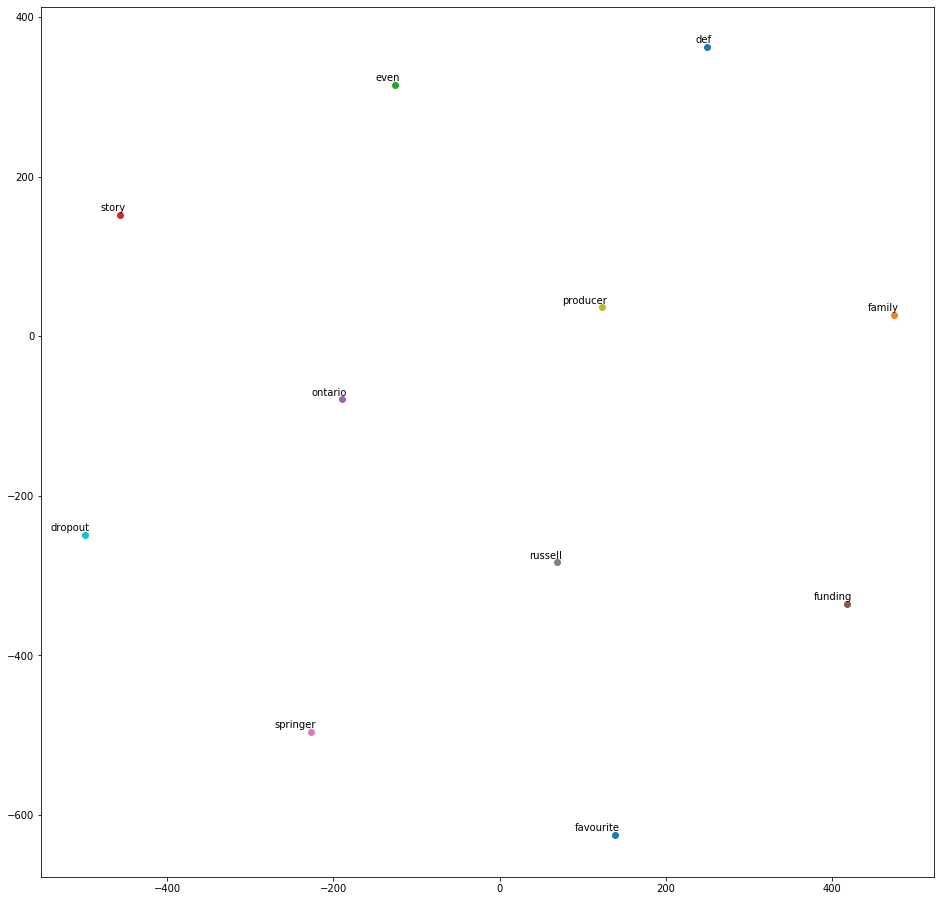

In [24]:
lab1('america')

Index of the word festival  is  225
Task 1: Thensors of words
tensor([[-1.8555,  0.6675,  0.4642,  0.2978,  0.6550],
        [-0.3876,  0.6999,  1.7293,  0.2606,  0.5481],
        [-0.6194,  0.8584,  1.2409,  0.1921,  0.7646],
        ...,
        [ 0.4763, -1.0605,  0.7784,  0.1631,  1.4132],
        [ 0.6197, -0.7749,  0.6433, -0.3812,  1.3791],
        [ 0.1676, -0.0662, -0.8555,  1.5114, -0.3350]])
[7.2550383, 419] best
[6.65102, 341] actor
[6.342246, 225] festival
[5.868586, 276] including
[5.7561903, 139] final
[4.9042225, 1969] drake
[4.6643863, 1830] tate
[4.6068196, 415] year
[4.60404, 18] one
[4.532853, 1247] thursday
tensor([-0.7495, -1.6292,  1.3320, -0.1952,  0.6456], grad_fn=<SelectBackward>) song
[[-1.323599   -1.4053102   1.0568604  -1.5819236   2.6510844 ]
 [-2.2562206  -0.9743181   0.30387124 -0.41384608  1.6040105 ]
 [-1.5212599  -1.7713972  -0.11473943 -0.38808092  0.8522876 ]
 [-0.87320185 -2.1020792  -1.1119161  -0.3179653   0.6636552 ]
 [-1.5871636  -1.7233727   

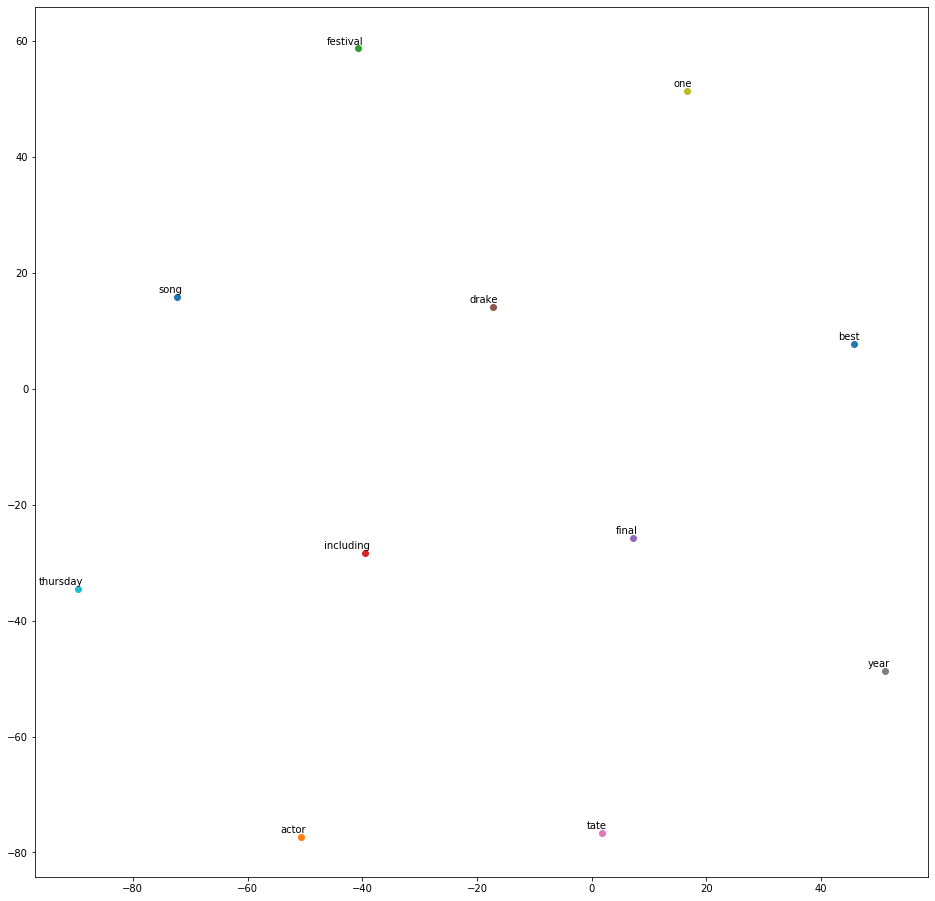

In [27]:
lab1('festival')